In [1]:
# 加载模块
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt; plt.style.use('seaborn')
import pyreadr as pr

In [2]:
result = pr.read_r('../load/xgb_matrix.Rdata')
print(result.keys()) 

odict_keys(['y_train', 'y_test', 'x_train', 'x_test'])


In [3]:
y_train = result['y_train']
y_test = result['y_test']
x_train = result['x_train']
x_test = result['x_test']

In [4]:
# 训练xgboost回归模型
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [5]:
y_pred = model.predict(x_test)
pred = pd.DataFrame(y_pred)

In [6]:
y_prob = model.predict_proba(x_test)
prob = pd.DataFrame(y_prob)

In [7]:
pre_xgb = pd.concat([pred, prob, y_test], axis=1, ignore_index=True)
pre_xgb.columns = ['predictions','prob_0','prob_1','labels']
pre_xgb.to_csv(f'../csv/pre_xgb.csv', encoding='utf-8')

In [8]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8019133370849747

In [9]:
cols=list(x_train.columns)
cols

['vis_24h',
 'vis_48h',
 'vis_reduction_rate',
 'max_vis_vasopressin_24h',
 'max_vis_dopamine_24h',
 'max_vis_dobutamine_24h',
 'max_vis_epinephrine_24h',
 'max_vis_milrinone_24h',
 'max_vis_norepinephrine_24h',
 'max_vis_vasopressin_48h',
 'max_vis_dopamine_48h',
 'max_vis_dobutamine_48h',
 'max_vis_epinephrine_48h',
 'max_vis_milrinone_48h',
 'max_vis_norepinephrine_48h']

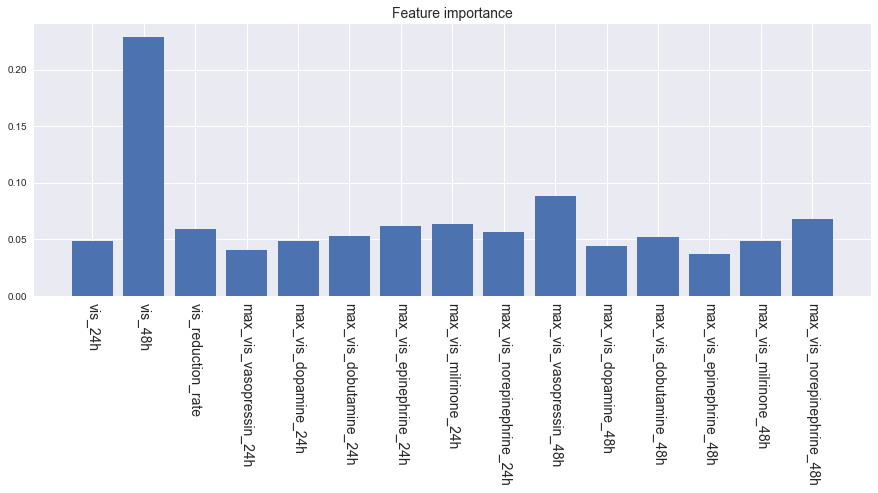

In [10]:
# 获取feature importance
plt.figure(figsize=(15, 5))
plt.bar(range(len(cols)), model.feature_importances_)
plt.xticks(range(len(cols)), cols, rotation=-90, fontsize=14)
plt.title('Feature importance', fontsize=14)
plt.show()

In [11]:
import shap
# model是在第1节中训练的模型
explainer = shap.TreeExplainer(model)

In [12]:
shap_values = explainer.shap_values(x_train)
print(shap_values.shape)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


(7110, 15)


In [13]:
type(shap_values)
shap_values[1,:]

array([ 0.24400528, -0.91469294, -0.0676372 ,  0.03862025,  0.18423381,
       -0.00472638,  0.04857314,  0.00514616, -0.15673032, -0.15020363,
       -0.02258383, -0.0204168 , -0.00175042,  0.00331941,  0.14013374],
      dtype=float32)

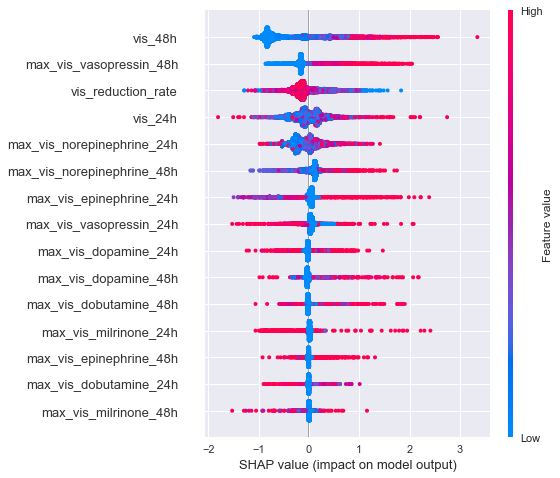

In [14]:
shap.summary_plot(shap_values, x_train, plot_size=0.35, show=False)
plt.savefig('../img/pdf/shap1.pdf', format='pdf', dpi=1000, bbox_inches='tight')

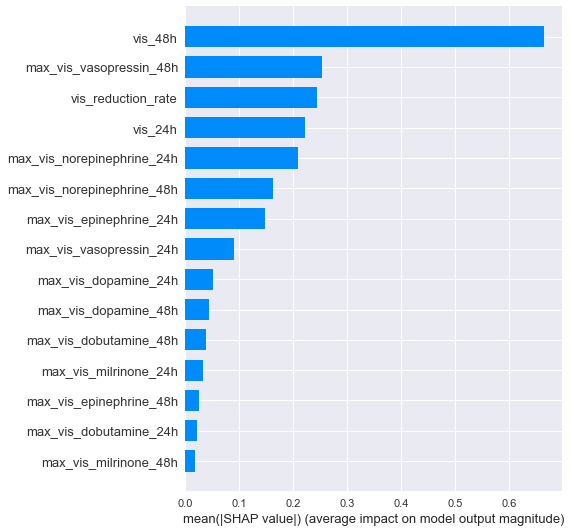

In [15]:
shap.summary_plot(shap_values, x_train, plot_type="bar", show=False)
plt.savefig('../img/pdf/shap2.pdf', format='pdf', dpi=1000, bbox_inches='tight')